In [35]:
# Instalando a biblioteca geopandas 
!pip install matplotlib geopandas geobr

In [3]:
#importando as bibliotecas utilizadas
import pandas as pd
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import geobr

In [36]:
df = pd.read_excel("estimativa_dou_2020.xls") # Arquivo IBGE
df.head() 

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
0,RO,11,15,Alta Floresta D'Oeste,22728
1,RO,11,23,Ariquemes,109523
2,RO,11,31,Cabixi,5188
3,RO,11,49,Cacoal,85893
4,RO,11,56,Cerejeiras,16204


In [9]:
df = df.rename(columns={'COD. UF':'code_state'}) # ALterando a coluna para fazer o Merge posteriormente

In [11]:
df_graf = df[['UF','code_state','POPULAÇÃO ESTIMADA','Valor Acumulado-Fic']]

In [8]:
br_uf = geobr.read_state() 
br_uf.head()

,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,11.0,RO,Rondônia,1.0,Norte,"MULTIPOLYGON (((-63.32721 -7.97672, -62.86662 ..."
1,12.0,AC,Acre,1.0,Norte,"MULTIPOLYGON (((-73.18253 -7.33550, -72.58477 ..."
2,13.0,AM,Amazonas,1.0,Norte,"MULTIPOLYGON (((-67.32609 2.02971, -67.31682 2..."
3,14.0,RR,Roraima,1.0,Norte,"MULTIPOLYGON (((-60.20051 5.26434, -60.19273 5..."
4,15.0,PA,Pará,1.0,Norte,"MULTIPOLYGON (((-54.95431 2.58369, -54.93542 2..."


In [12]:
df_geo = br_uf.merge(df_graf)

In [14]:
df_geo = df_geo[['geometry','POPULAÇÃO ESTIMADA']]

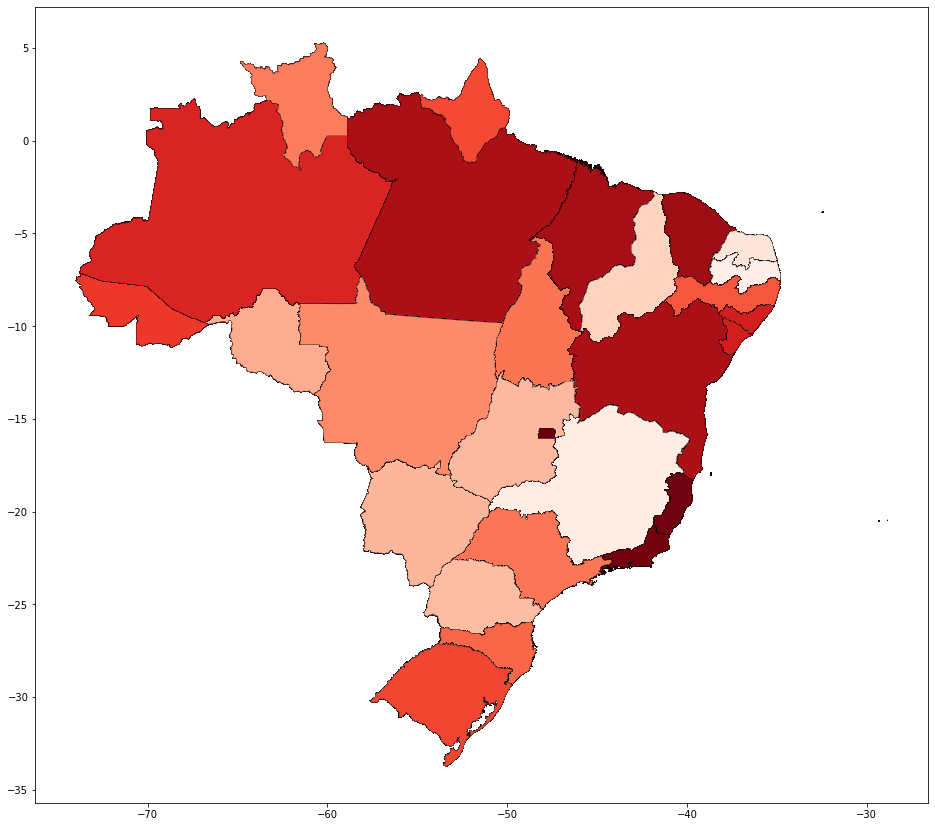

In [37]:
f, ax = plt.subplots()
f.set_size_inches(16, 16)

df_geo.plot(
    ax=ax,                              # Axis de destino do gráfico
    column='POPULAÇÃO ESTIMADA',        # Coluna com os valores usados para colorir o mapa
    cmap="Reds",                        # Mapa de cores
    edgecolor="black",                  # Cor dos contornos
    linewidth=0.25,                     # Espessura dos contornos
)
